<a href="https://colab.research.google.com/github/RicardoJ4ir/Ciencia-de-Datos-Clase-2023/blob/main/Ciencia_de_datos_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vera Santana Juan Manuel
# Yáñez Hernández Ricardo Jair
## Proyecto Ciencia de Datos (TSFC2)

In [ ]:
import numpy as np # Para analizar los datos
import pandas as pd # Para el análisis y visualizacion de los datos
from string import ascii_uppercase as letras # Para las letras de la fase de grupos
from selenium import webdriver # Para la prueba automatizada y validación de las páginas de internet
from selenium.webdriver.chrome.service import Service # Lo usamos para poder abrir Chrome
import time # Para poder hacer un tiempo de espera y no piensen que somos hackers de la deepweeb usando bots
from scipy.stats import poisson 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **Recolección de datos**

## **Obtención de los grupos 2022**

In [ ]:
grupos_2022 = pd.read_html(r'https://web.archive.org/web/20221014172443/https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol_de_2022')
# Dado que ya pasó el mundial 2022 se uso web.archive.org para recuperar la información de la página de Wikipedia 
# antes del mundial

In [ ]:
# Inspeccionamos la tabla y buscamos el xpath con el atributo 'table' y buscamos nuetra tabla de grupos, la cual según el 
# contador de la página es la 11, pero considerando que python cuenta desde el cero la tabla que buscamos es la 10
# Hacemos un diccionario con todas las fases de grupo
dict_grupos_2022 = {}
for grupo,i in zip(letras, range(8)):
    dict_grupos_2022[f'Grupo {grupo}'] =  grupos_2022[10+7*i] 

In [ ]:
dict_grupos_2022['Grupo A'] # Comprobamos que funcionó nuestro diccionario

,Selección,Pts,PJ,PG,PE,PP,GF,GC,Dif
0,Catar,0,0,0,0,0,0,0,0
1,Ecuador,0,0,0,0,0,0,0,0
2,Senegal,0,0,0,0,0,0,0,0
3,Países Bajos,0,0,0,0,0,0,0,0


## **Obtención del itinerario de partidos de la primera fase**

In [ ]:
#Obtenemos los partidos pactados para el mundial 2022, esto usando la página para obtener los grupos

path = r"C:\Users\Cuatro\Downloads\chromedriver_win32\chromedriver.exe" # El path del webdriver
service = Service(executable_path = path)
driver = webdriver.Chrome(service=service)

web = 'https://web.archive.org/web/20221014172443/https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol_de_2022' #La web 
# donde obtendremos la información. Usaremos la información de la misma forma que la sección anterior
driver.get(web)
Partidos = driver.find_elements(by = 'xpath', value = '//td[@width="24%"]/..' ) #Obtenemos el xpath

# Inicializamos nuestras listas para guardar la información
seleccion_1 = []
marcador = []
seleccion_2 = []

for partido in Partidos:
    seleccion_1.append(partido.find_element(by = 'xpath', value = './td[2]').text)
    marcador.append(partido.find_element(by = 'xpath', value = './td[3]').text)
    seleccion_2.append(partido.find_element(by = 'xpath', value = './td[4]').text)
    
    dict_partidos_pactados = {'seleccion_1':seleccion_1,
                     'marcador': marcador,
                     'seleccion_2':seleccion_2}
    
df_partidos_pactados = pd.DataFrame(dict_partidos_pactados)
df_partidos_pactados['año'] = 2022

time.sleep(2)
    
driver.quit() 


In [ ]:
df_partidos_pactados
df_partidos_pactados.to_csv('Partidos_pactados_2022', index = False) # Exportamos la organización de los partidos

## **Extracción de datos para los mundiales anteriores**

In [ ]:
#Probamos para un año en particular para obtener la información de los mundiales pasados

path = r"C:\Users\Cuatro\Downloads\chromedriver_win32\chromedriver.exe"
service = Service(executable_path = path)
driver = webdriver.Chrome(service=service)

web = 'https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol_de_1934'
driver.get(web)
Partidos = driver.find_elements(by = 'xpath', value = '//td[@width="24%"]/..' )

seleccion_1 = []
marcador = []
seleccion_2 = []

for partido in Partidos:
    seleccion_1.append(partido.find_element(by = 'xpath', value = './td[2]').text)
    marcador.append(partido.find_element(by = 'xpath', value = './td[3]').text)
    seleccion_2.append(partido.find_element(by = 'xpath', value = './td[4]').text)
    
    dict_fuchibol = {'seleccion_1':seleccion_1,
                     'marcador': marcador,
                     'seleccion_2':seleccion_2}
    
df_fuchibol = pd.DataFrame(dict_fuchibol)
df_fuchibol['año'] = 1930

time.sleep(2)
    
driver.quit() 
# df_fuchibol.to_csv('Mundiales_1934', index = False)

In [ ]:
#Para todos los años, ahora sí

Años = [1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014,2018]


path = r"C:\Users\Cuatro\Downloads\chromedriver_win32\chromedriver.exe"
service = Service(executable_path = path)
driver = webdriver.Chrome(service=service)

# Definimos una función para obtener la información de todos los años la cual pedirá el año y dará como salida la información
# de los partidos

def Datos_Mundiales(año):
    
    fuente = f'https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol_de_{año}' # Pagina que irá variando de donde se obtiene la info
    
    driver.get(fuente) # Se abre la página en Chrome para comenzar la busqueda
    
    Partidos = driver.find_elements(by = 'xpath', value = '//td[@width="24%"]/..' ) # Busca el xpath de las tablas que nos interesa
    
    seleccion_1 = []
    marcador = []
    seleccion_2 = [] #Inicializamos nuestras listas donde se guardará la info
    
    for partido in Partidos:
        seleccion_1.append(partido.find_element(by = 'xpath', value = './td[2]').text)
        
        marcador.append(partido.find_element(by = 'xpath', value = './td[3]').text)
        
        seleccion_2.append(partido.find_element(by = 'xpath', value = './td[4]').text)
        #Obtenemos los 3 datos que nos interesan, los cuales son las selecciones que jugaron y el marcador final
        dict_fuchibol = {'seleccion_1':seleccion_1,
                         'marcador': marcador,
                         'seleccion_2':seleccion_2} # Generamos un diccionario
    
    df_fuchibol = pd.DataFrame(dict_fuchibol) # Lo hacemos DF
    
    df_fuchibol['año'] = año #Agregamos el año
    
    time.sleep(2) # Damos un tiempo de descanso para que no piensen que somos bots
    
    return df_fuchibol #Obtenemos el dataframe con la info
    

DFs_Mundiales = [Datos_Mundiales(año) for año in Años] # Juntamos todos los DF en una lista
driver.quit() 



df_Mundiales = pd.concat(DFs_Mundiales, ignore_index = True) # La concatenamos

df_Mundiales.to_csv('MundialesDataSet', index = False) # Exportamos el dataset

# **Limpieza de datos**

In [ ]:
df_Mundiales = pd.read_csv('MundialesDataSet')
df_Mundiales

,seleccion_1,marcador,seleccion_2,año
0,Francia,4:1 (3:0),México,1930
1,Argentina,1:0 (0:0),Francia,1930
2,Chile,3:0 (1:0),México,1930
3,Chile,1:0 (0:0),Francia,1930
4,Argentina,6:3 (3:1),México,1930
...,...,...,...,...
895,Rusia,"2:2 (1:1, 1:1) (t. s.)\n(3:4 p.)",Croacia,2018
896,Francia,1:0 (0:0),Bélgica,2018
897,Croacia,"2:1 (1:1, 0:1) (t. s.)",Inglaterra,2018
898,Bélgica,2:0 (1:0),Inglaterra,2018


In [ ]:
#Borramos los espacios en blanco que puedan tener las palabras
# Lo hacemos para ambos y guardamos los cambios

df_Mundiales['seleccion_1'] = df_Mundiales['seleccion_1'].str.strip()
df_Mundiales['seleccion_2'] = df_Mundiales['seleccion_2'].str.strip()
df_Mundiales

,seleccion_1,marcador,seleccion_2,año
0,Francia,4:1 (3:0),México,1930
1,Argentina,1:0 (0:0),Francia,1930
2,Chile,3:0 (1:0),México,1930
3,Chile,1:0 (0:0),Francia,1930
4,Argentina,6:3 (3:1),México,1930
...,...,...,...,...
895,Rusia,"2:2 (1:1, 1:1) (t. s.)\n(3:4 p.)",Croacia,2018
896,Francia,1:0 (0:0),Bélgica,2018
897,Croacia,"2:1 (1:1, 0:1) (t. s.)",Inglaterra,2018
898,Bélgica,2:0 (1:0),Inglaterra,2018


In [ ]:
df_Mundiales['marcador'].info()
# Tenemos que el tipo es object, por lo que hay filas en donde tenemos información extra además del marcador

<class 'pandas.core.series.Series'>
RangeIndex: 900 entries, 0 to 899
Series name: marcador
Non-Null Count  Dtype 
--------------  ----- 
900 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [ ]:
df_Mundiales['marcador'] = df_Mundiales['marcador'].str.split(' ', expand = True)[0] 
# La columna donde está el marcador viene con más info además de el puntaje, ya sean los penales o si se fueron a tiempo extra
# Por lo que usando el método str.split para separar esta columna en varias columnas, separadas por los espacios en blanco
# Sólo nos sirve la primera columna pues es donde viene el marcador, por lo que redefinimos la columna del marcador de nuestro
# df como la columna cero obtenida de divir nuestra columna original
df_Mundiales

,seleccion_1,marcador,seleccion_2,año
0,Francia,4:1,México,1930
1,Argentina,1:0,Francia,1930
2,Chile,3:0,México,1930
3,Chile,1:0,Francia,1930
4,Argentina,6:3,México,1930
...,...,...,...,...
895,Rusia,2:2,Croacia,2018
896,Francia,1:0,Bélgica,2018
897,Croacia,2:1,Inglaterra,2018
898,Bélgica,2:0,Inglaterra,2018


In [ ]:
df_Mundiales['marcador'] = df_Mundiales['marcador'].str.replace('[^\d]',' ', regex = True) # Quitamos los dos puntos y los reemplazamos por un espacio en blanco
df_Mundiales

,seleccion_1,marcador,seleccion_2,año
0,Francia,4 1,México,1930
1,Argentina,1 0,Francia,1930
2,Chile,3 0,México,1930
3,Chile,1 0,Francia,1930
4,Argentina,6 3,México,1930
...,...,...,...,...
895,Rusia,2 2,Croacia,2018
896,Francia,1 0,Bélgica,2018
897,Croacia,2 1,Inglaterra,2018
898,Bélgica,2 0,Inglaterra,2018


In [ ]:
df_Mundiales[['Goles_1', 'Goles_2']] = df_Mundiales['marcador'].str.split(' ', expand = True)
# Volvemos a separar la columna del marcador para obtener los valores de los goles anotados por cada equipo y definimos
# dos nuevas columnas
df_Mundiales

,seleccion_1,marcador,seleccion_2,año,Goles_1,Goles_2
0,Francia,4 1,México,1930,4,1
1,Argentina,1 0,Francia,1930,1,0
2,Chile,3 0,México,1930,3,0
3,Chile,1 0,Francia,1930,1,0
4,Argentina,6 3,México,1930,6,3
...,...,...,...,...,...,...
895,Rusia,2 2,Croacia,2018,2,2
896,Francia,1 0,Bélgica,2018,1,0
897,Croacia,2 1,Inglaterra,2018,2,1
898,Bélgica,2 0,Inglaterra,2018,2,0


In [ ]:
df_Mundiales.drop('marcador', axis = 1, inplace = True) # Nos podemos deshacer de nuestra columna del marcador

In [ ]:
df_Mundiales.rename(columns = {'año':'A','seleccion_1':'B', 'Goles_1':'C', 'seleccion_2':'E', 'Goles_2':'D'}, inplace = True)
# Renombramos las columnas para poder reorganizarlas

In [ ]:
df_Mundiales = df_Mundiales[sorted(df_Mundiales.columns)]  # Aquí las organizamos con la función sorted
df_Mundiales

,A,B,C,D,E
0,1930,Francia,4,1,México
1,1930,Argentina,1,0,Francia
2,1930,Chile,3,0,México
3,1930,Chile,1,0,Francia
4,1930,Argentina,6,3,México
...,...,...,...,...,...
895,2018,Rusia,2,2,Croacia
896,2018,Francia,1,0,Bélgica
897,2018,Croacia,2,1,Inglaterra
898,2018,Bélgica,2,0,Inglaterra


In [ ]:
df_Mundiales.rename(columns = {'A':'año','B':'seleccion_1', 'C':'goles_1','E':'seleccion_2', 'D':'goles_2'}, inplace = True)
df_Mundiales # Volvemos a renombrar nuestras columnas para tener la información

,año,seleccion_1,goles_1,goles_2,seleccion_2
0,1930,Francia,4,1,México
1,1930,Argentina,1,0,Francia
2,1930,Chile,3,0,México
3,1930,Chile,1,0,Francia
4,1930,Argentina,6,3,México
...,...,...,...,...,...
895,2018,Rusia,2,2,Croacia
896,2018,Francia,1,0,Bélgica
897,2018,Croacia,2,1,Inglaterra
898,2018,Bélgica,2,0,Inglaterra


In [ ]:
df_Mundiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   año          900 non-null    int64 
 1   seleccion_1  900 non-null    object
 2   goles_1      900 non-null    object
 3   goles_2      900 non-null    object
 4   seleccion_2  900 non-null    object
dtypes: int64(1), object(4)
memory usage: 35.3+ KB


In [ ]:
df_Mundiales = df_Mundiales.astype({'goles_1':int, 'goles_2':int})
# Nuestros valores para los goles aparecen como object, por lo que hay cambiarlos a enteros (int)
df_Mundiales

,año,seleccion_1,goles_1,goles_2,seleccion_2
0,1930,Francia,4,1,México
1,1930,Argentina,1,0,Francia
2,1930,Chile,3,0,México
3,1930,Chile,1,0,Francia
4,1930,Argentina,6,3,México
...,...,...,...,...,...
895,2018,Rusia,2,2,Croacia
896,2018,Francia,1,0,Bélgica
897,2018,Croacia,2,1,Inglaterra
898,2018,Bélgica,2,0,Inglaterra


In [ ]:
df_Mundiales.to_csv('Mundiales_DS_limpio.csv', index = False)
# Exportamos nuestro csv

# **Análisis y predicción**

In [ ]:
dict_grupos_2022 # Fases de grupos
Mundiales = pd.read_csv('Mundiales_DS_limpio.csv') # Partidos jugados en todos los mundiales
partidos  = pd.read_csv('partidos_pactados_2022') # Organización de los partidos


In [ ]:
# Haremos un df que nos diga el nivel de poder de una selección en función de los goles que ha anotado y que ha recibido
# Para esto haremos dos df donde seleccionamos las selecciones 1 y 2 por separado
df_seleccion1 = Mundiales[['seleccion_1','goles_1','goles_2']] 
df_seleccion2 = Mundiales[['seleccion_2','goles_1','goles_2']]


In [ ]:
# Renombramos los ds para usar la seleccion x independientemente de si es la seleccion 1 o 2 para estandarizarlo
df_seleccion1 = df_seleccion1.rename(columns = {'seleccion_1':'seleccion', 'goles_1':'goles_anotados', 'goles_2':'goles_recibidos'})
df_seleccion2 = df_seleccion2.rename(columns = {'seleccion_2':'seleccion', 'goles_1':'goles_recibidos', 'goles_2':'goles_anotados'})


In [ ]:
df_niveles_de_poder = pd.concat([df_seleccion1, df_seleccion2], ignore_index = True) # Juntamos los df anteriores, con esto podemos tener todos los goles anotados y recibidos por selección
df_niveles_de_poder = df_niveles_de_poder.groupby('seleccion') # Agrupamos por país
df_niveles_de_poder = df_niveles_de_poder.mean() #Obtenemos el promedio de los goles anotados y recibidos
# Con esto obtenemos el promedio de los goles anotados y los goles recibidos por seleccion
# ('¡Su nivel de poder es de más de 9,000!')
df_niveles_de_poder

,goles_anotados,goles_recibidos
seleccion,,
Alemania,2.021277,1.021277
Alemania Democrática,0.833333,0.833333
Alemania Federal,2.112903,1.241935
Angola,0.333333,0.666667
Arabia Saudita,0.687500,2.437500
...,...,...
Ucrania,1.000000,1.400000
Unión Soviética,1.709677,1.096774
Uruguay,1.553571,1.321429


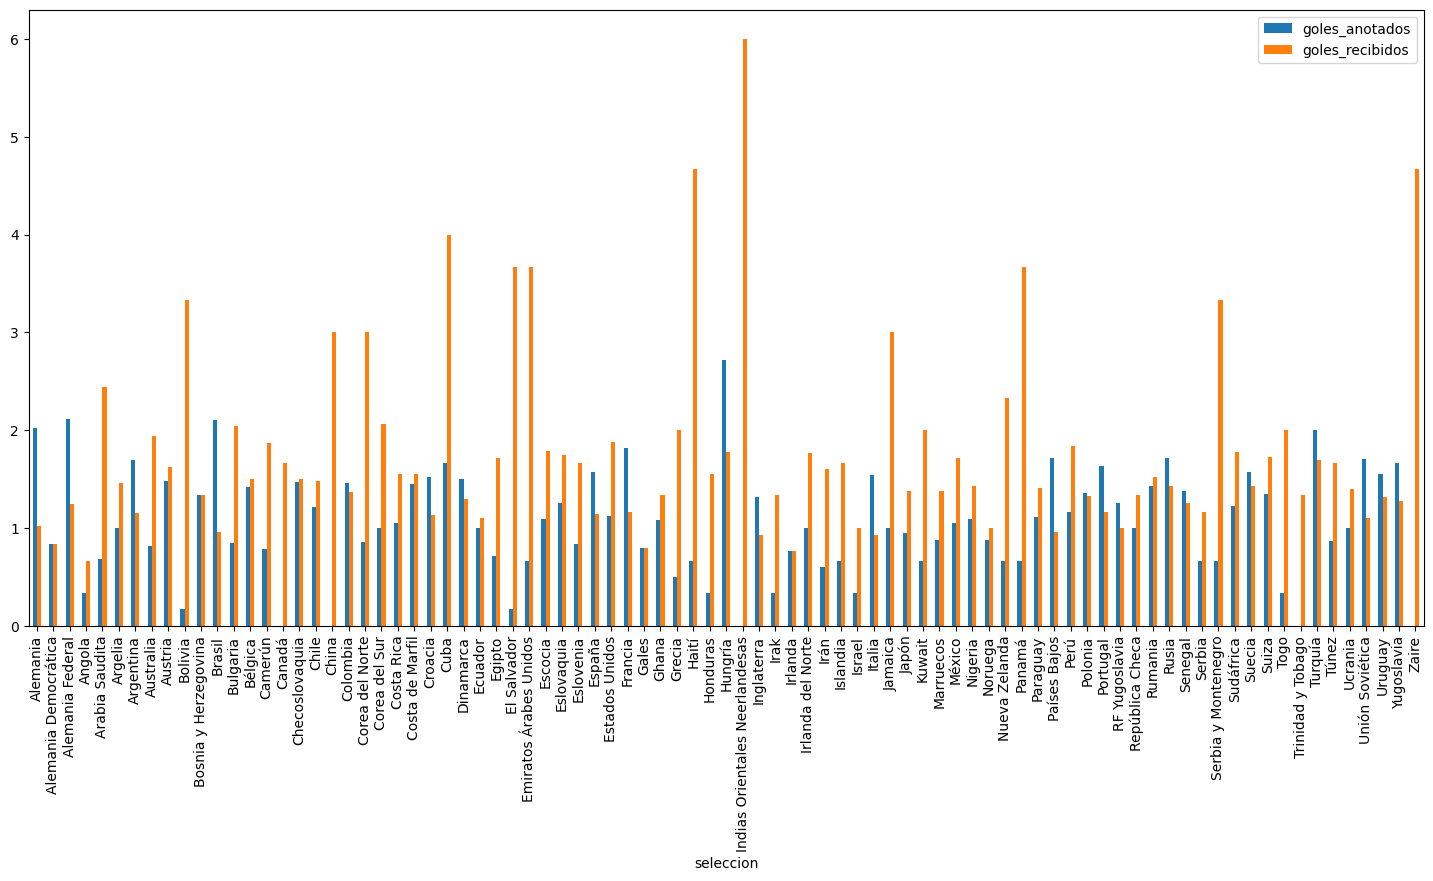

In [ ]:
df_niveles_de_poder.plot(kind = 'bar', width=0.5 ,figsize=(18,8))
plt.savefig('Niveles_de_poder_por_país.png', bbox_inches='tight')

In [ ]:
def prediccion (seleccion1, seleccion2):
    if seleccion1 in df_niveles_de_poder.index and seleccion2 in df_niveles_de_poder.index:
        
        # Lamda es el número esperado de eventos por intervalo de tiempo
        
        # lambda = goles_anotados * goles_recibidos 
        # es decir, es la fuerza de uno por la debilidad del otro
        
        lambd_seleccion1 = df_niveles_de_poder.at[seleccion1, 'goles_anotados']*df_niveles_de_poder.at[seleccion2, 'goles_recibidos']
        # Promedio de goles anotados por la seleccion1 por el promedio de goles recibidos de la seleccion2 
        
        lambd_seleccion2 = df_niveles_de_poder.at[seleccion2, 'goles_anotados']*df_niveles_de_poder.at[seleccion1, 'goles_recibidos'] 
        # Promedio de goles anotados por la seleccion2 por el promedio de goles recibidos de la seleccion1 
        
        probabilidad_seleccion1, probabilidad_seleccion2, probabilidad_empate = 0,0,0 # Inicializamos nuestras probabilidades 
        
        #Con el bucle for intentamos simular todos los posibles resultados del marcador. Lo dejamos en 10 pues la mayor
        #goleada registrad en un mundial es 10-1 en el mundial de Hungría vs El Salvador en el mundial de España del 82
        
        for g_a in range(0,11): #Numero de goles anotados (o recibidos por el otro equipo)
            for g_r in range(0,11): # Numero de goles recibidos (o anotados por el otro equipo)
                P = poisson.pmf(g_a, lambd_seleccion1) * poisson.pmf(g_r, lambd_seleccion2) # Calculamos las probabilidades
                if g_a == g_r:
                    probabilidad_empate += P # (Empate)
                elif g_a > g_r : # Si gana la selección 2
                    probabilidad_seleccion1 += P
                else: # Si gana la selección 2
                    probabilidad_seleccion2 += P
        
        puntos_seleccion1 = 3*probabilidad_seleccion1 + probabilidad_empate
        puntos_seleccion2 = 3*probabilidad_seleccion2 + probabilidad_empate
        # Esto viene de la forma en como se dan los puntajes, si gana la seleccion1 entonces la probabilidad de empate es cero
        # tiene los tres puntos, lo mismo para la selección dos. Si hay empate, la probabilidad de esto es del 100% y sólo se le
        # da un punto a cada equipo
        return (puntos_seleccion1, puntos_seleccion2)
    else:
        return (0,0) # Esto es por si una selección en la fase de grupos no aparece en nuestro df del mundial
    #Que si bien esto no implica que sea un mal equipo, no tenemos más información para evaluarlo

### **Probando nuestra función**

In [ ]:
# Probamos con el partido Argentina - Mexico:
prediccion('Argentina', 'México')
# Esto nos dice que es muy probable que México pierda, lo cual efectivamente pasó
# (México perdiendo, que novedad )

(2.3129151525530505, 0.5378377125059863)

In [ ]:
# Con el partido Irán - Estados Unidos
prediccion('Irán', 'Estados Unidos')
# Efectivamente, ganó E.U.

(0.9466905055353864, 1.8213492238936984)

In [ ]:
# Con el partido Catar - Ecuador
prediccion('Catar', 'Ecuador')
# Este caso es especial, pues es la primera vez de Catar y realmente no podriamos
# decir si gana o pierde o empata pues no tenemos info
# Aún así, Catar perdió todos sus partidos en el mundial (XD), por lo que no afecta
# Realmente a los calculos 
# De la misma forma, Ecuador sólo ganó este partido y perdió los demás
# por lo que tampoco afecta mucho los calculos

(0, 0)

In [ ]:
partidos_fase_de_grupos = partidos[:48].copy() #Primeros 46 partidos

octavos_de_final = partidos[48:56].copy() # Octavos de final

cuartos_de_final = partidos[56:60].copy() # Cuartos de final

semifinales = partidos[60:62].copy() # Semifinales

finales = partidos[62:].copy() # Finales (y tercer lugar)



In [ ]:
for grupo in dict_grupos_2022: #Comenzamos haciendo un bucle sobre el diccionario de los grupos
    equipos_en_grupo = dict_grupos_2022[grupo]['Selección'].values # Obtenemos el nombre de los equipos de cada grupo
    
    partidos_de_a_6 = partidos_fase_de_grupos[partidos_fase_de_grupos['seleccion_1'].isin(equipos_en_grupo)] # Dividimos los 48 partidos en grupos de 46 partidos (como vienen organizados)
    # Con el método .isin() filtramos los 48 partidos con sólo las seleccions que conforman los 6 partidos. Así evitamos partidos que no están planeados
   
    for index, row in partidos_de_a_6.iterrows(): # Con el método .iterrows() podemos hacer iteraciones sobre las filas del df
        seleccion_1, seleccion_2 = row['seleccion_1'], row['seleccion_2'] # Iteramos
        puntos_seleccion1, puntos_seleccion2 = prediccion(seleccion_1, seleccion_2) #Aplicamos nuestra formulota y asignamos los valores
        # Asignamos los pts a la tabla de posciones
        # Ubicamos el equipo al que le queremos añadir los puntos, esto con la ayuda del método .loc()
        dict_grupos_2022[grupo].loc[dict_grupos_2022[grupo]['Selección'] == seleccion_1, 'Pts'] += puntos_seleccion1
        dict_grupos_2022[grupo].loc[dict_grupos_2022[grupo]['Selección'] == seleccion_2, 'Pts'] += puntos_seleccion2

    dict_grupos_2022[grupo] = dict_grupos_2022[grupo].sort_values('Pts', ascending=False).reset_index() # Ordenamos nuestros equipos de acuerdo a el que tenga más puntos
    dict_grupos_2022[grupo] = dict_grupos_2022[grupo][['Selección', 'Pts']] # Sólo tomamos las dos columnas que nos importan
    dict_grupos_2022[grupo] = dict_grupos_2022[grupo].round(0) # Redondeamos a cero para que se vea chulo

## **Primera fase**

In [ ]:
selecciones_que_pasan = pd.concat(dict_grupos_2022.values())
selecciones_que_pasan # Juntamos todas las selecciones de la fase de grupos y sus puntos, en los primeros dos puestos (de cada cuatro) aparecen las selecciones que lograron pasar

,Selección,Pts
0,Países Bajos,4.0
1,Senegal,2.0
2,Ecuador,2.0
3,Catar,0.0
0,Inglaterra,6.0
1,Gales,5.0
2,Estados Unidos,3.0
3,Irán,2.0
0,Argentina,7.0
1,Polonia,6.0


## **Octavos de final**

In [ ]:
# Ahora para los octavos, actualizamos los valores para la tabla

for grupo in dict_grupos_2022: # Recorremos el diccionario con los grupos 
    # Con los values del diccionario ya actualizado y organizado tomaos los primeros dos de cada df que son los que pasan
    ganador_del_grupo = dict_grupos_2022[grupo].loc[0, 'Selección'] # Campeón del grupo
    subcampeon_del_grupo = dict_grupos_2022[grupo].loc[1, 'Selección'] # Subcampeón del grupo
    octavos_de_final.replace({f'1.° {grupo}': ganador_del_grupo, 
                             f'2.° {grupo}': subcampeon_del_grupo}, inplace = True) # Actualizamos el df de los octavos de final
octavos_de_final['gana'] = '?' # Agregamos una columna donde irá el ganador (que aún no sabemos)

In [ ]:
# Definimos una función que nos entrega el ganador de cada partido comparando nuetra función 'predicción'
def ganador(df):
    for index, row in df.iterrows(): # Recorremos el dataframe desde sus columnas y por sus indices
        seleccion1, seleccion2 = row['seleccion_1'], row['seleccion_1'] # Definimos a la selección 1 y 2
        puntos1, puntos2 = prediccion(seleccion1, seleccion2) # Se asignan los puntos de sus respectivos encuentros
        if puntos1 > puntos2: # Se comparan y se da el ganador
            gana = seleccion1
        else:
            gana = seleccion2
        df.loc[index, 'gana'] = gana
    return df

In [ ]:
ganador(octavos_de_final) # Se obtienen los ganadores de los octavos de final
octavos_de_final.replace(to_replace= 'Croacia', value = 'España', inplace=True ) # Fue necesario meter el valor del penultimo partido a mano
octavos_de_final

,seleccion_1,marcador,seleccion_2,año,gana
48,Países Bajos,Partido 49,Gales,2022,Países Bajos
49,Argentina,Partido 50,Dinamarca,2022,Argentina
50,Francia,Partido 52,Polonia,2022,Francia
51,Inglaterra,Partido 51,Senegal,2022,Inglaterra
52,Alemania,Partido 53,Bélgica,2022,Alemania
53,Brasil,Partido 54,Uruguay,2022,Brasil
54,España,Partido 55,España,2022,España
55,Portugal,Partido 56,Suiza,2022,Portugal


In [ ]:
# Definimos una nueva función que nos actualiza el DF de la siguiente ronda en función del df de la anterior
def actualizar(df1,df2):
    for index, row in df1.iterrows(): # Recorremos indices y columnas
        ganador = df1.loc[index,'gana'] # Se toma al ganador de la ronda anterior
        partido = df1.loc[index,'marcador'] # Se usa el partido que viene en la columna 'marcador' como referencia
        df2.replace({f'Ganador {partido.lower()}':ganador},inplace = True) # Se reemplazan los valores
    df2['gana'] = '?' # Agregamos una nueva columna para el futuro ganador
    return df2


## **Cuartos de final**

In [ ]:
actualizar(octavos_de_final,cuartos_de_final) # Obtenemos las selecciones de los cuartos de final

,seleccion_1,marcador,seleccion_2,año,gana
56,Alemania,Partido 58,Brasil,2022,?
57,Países Bajos,Partido 57,Argentina,2022,?
58,España,Partido 60,Portugal,2022,?
59,Inglaterra,Partido 59,Francia,2022,?


In [ ]:
# Obtenemos los ganadores de sus respectivos partidos
print(prediccion('Alemania', 'Brasil'),'\n', prediccion('Países Bajos', 'Argentina'), '\n' ,prediccion('España', 'Portugal' ), '\n' ,prediccion('Inglaterra', 'Francia'))

(1.2846784356494922, 1.511674511485365) 
 (1.604269079536781, 1.1794716233452616) 
 (1.3719843399546263, 1.411969529586695) 
 (1.2894040658845412, 1.4779995351193362)


In [ ]:
# Actualizamos la tabla de los cuartos de final con los respectivos ganadores
cuartos_de_final['gana'] = ['Brasil', 'Argentina', 'Portugal', 'Francia']
cuartos_de_final

,seleccion_1,marcador,seleccion_2,año,gana
56,Alemania,Partido 58,Brasil,2022,Brasil
57,Países Bajos,Partido 57,Argentina,2022,Argentina
58,España,Partido 60,Portugal,2022,Portugal
59,Inglaterra,Partido 59,Francia,2022,Francia


## **Semifinales**

In [ ]:
actualizar(cuartos_de_final,semifinales) # Actualizamos la tabla de las semifinales

,seleccion_1,marcador,seleccion_2,año,gana
60,Argentina,Partido 61,Brasil,2022,?
61,Francia,Partido 62,Portugal,2022,?


In [ ]:
print(prediccion('Argentina', 'Brasil'), '\n' , prediccion('Francia', 'Portugal')) # Se obtienen los resultados de los encuentros

(0.961485596233405, 1.845703399768912) 
 (1.5215621130930101, 1.2731571152442067)


In [ ]:
semifinales['gana'] = ['Brasil', 'Francia'] # Actualizamos la tabla con los ganadores
semifinales

,seleccion_1,marcador,seleccion_2,año,gana
60,Argentina,Partido 61,Brasil,2022,Brasil
61,Francia,Partido 62,Portugal,2022,Francia


In [ ]:
actualizar(semifinales, finales) # Obtenemos la tabla de la final (y el juego por el tercer lugar)
finales.replace(to_replace= 'Perdedor partido 61', value = 'Argentina', inplace=True )
finales.replace(to_replace= 'Perdedor partido 62', value = 'Portugal', inplace=True )
finales

,seleccion_1,marcador,seleccion_2,año,gana
62,Argentina,Partido 63,Portugal,2022,?
63,Brasil,Partido 64,Francia,2022,?


In [ ]:
ganador(finales)

,seleccion_1,marcador,seleccion_2,año,gana
62,Argentina,Partido 63,Portugal,2022,Argentina
63,Brasil,Partido 64,Francia,2022,Brasil


In [ ]:
# Se obtiene como campeón a Brasil, como segundo lugar a Francia, como tercer a Argentina y como cuarto lugar a Portugal